In [48]:
import json
import requests
import pandas as pd
from pprint import pprint
from config import api_key
import matplotlib.pyplot as plt

In [49]:
url = "https://www.quandl.com/api/v3/datasets/YALE/SPCOMP.json?"

query_url = f'{url}api_key={api_key}'

testing = requests.get(query_url).json()

In [50]:
# pprint(testing)

In [51]:
stock_data = pd.DataFrame(testing["dataset"]["data"])
stock_clean = stock_data.rename(columns = {0: "Monthly Tracking", 1:"S&P Composite", 2: "Dividend", 3:"Earnings", 4:"CPI",
                                                 5: "Long Interest Rate", 6:"Real Price", 7:"Real Dividend", 8:"Real Earning",
                                                 9: "Cyclically Adjusted PE Ratio"})
# stock_clean

In [52]:
stock_clean = stock_clean.fillna(0)

In [53]:
# Getting information from the table
stock_present = stock_clean.loc[stock_clean["Monthly Tracking"] >="2010-01-31"]
stock_present = stock_present.sort_values("Monthly Tracking", ascending=True)
stock_present.head()

,Monthly Tracking,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earning,Cyclically Adjusted PE Ratio
104,2010-01-31,1123.58,22.240000,54.290000,216.687,3.73,1306.784565,25.866328,63.142219,20.527860
103,2010-02-28,1089.16,22.070000,57.610000,216.741,3.69,1266.436631,25.662213,66.986865,19.920539
102,2010-03-31,1152.05,21.900000,60.930000,217.631,3.73,1334.084762,25.360406,70.557514,21.004601
101,2010-04-30,1197.32,21.946667,62.986667,218.009,3.85,1384.103820,25.370381,72.812687,21.804846
100,2010-05-31,1125.06,21.993333,65.043333,218.178,3.42,1299.563727,25.404635,75.131954,20.480069


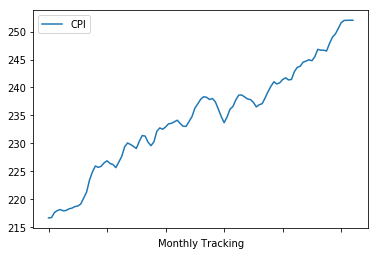

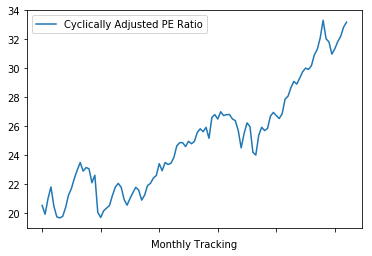

In [54]:
stock_present.plot(kind="line", x="Monthly Tracking", y="CPI")
stock_present.plot(kind="line", x="Monthly Tracking", y="Cyclically Adjusted PE Ratio")
plt.show()